# Introduction to notebook 3  
This notebook will be used in order to tackle the 2nd part of my problem statement, where I will be walking the hiring Real Estate's anaylist, *Bob* through how to understand the *best* model we made, such as: 
- Why we made the model the way we did  
- Cleaning the data  
- How to look for important features
- Importance of graphing to have a more visual understanding  
- General advice to look out for in the future.

# Data Dictionary for the columns used
### [Full Data Dictionary Here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
|     Column     |  Type |                        Description                        |
|:--------------:|:-----:|:---------------------------------------------------------:|
|    Lot Area    |  int  |                  Lot size in square feet                  |
|  Neighborhood  |  obj  |         Physical locations within Ames city limits        |
|     School     |  obj  |      Schools based where the neighborhood was located     |
|  Overall Qual  |  int  |     Rates the overall material and finish of the house    |
|  Overall Cond  |  int  |          Rates the overall condition of the house         |
|   Year Built   |  int  |                    Year house was built                   |
| Year Remod/Add |  int  |    Year house was remodeled or had additional work done   |
|  BsmtFin SF 1  | float |                Type 1 finished square feet                |
|   Bsmt Unf SF  | float |          Unfinished square feet of basement area          |
|  Total Bsmt SF | float |             Total square feet of basement area            |
|   1st Flr SF   |  int  |                  First Floor square feet                  |
|   2nd Flr SF   |  int  |                  Second floor square feet                 |
|   Gr Liv Area  |  int  |        Above grade (ground) living area square feet       |
| Bsmt Full Bath | float |                  Basement full bathrooms                  |
| Bsmt Half Bath | float |                  Basement half bathrooms                  |
|    Full Bath   |  int  |                 Full bathrooms above grade                |
|    Half Bath   |  int  |                   Half baths above grade                  |
|  Bedroom AbvGr |  int  | Bedrooms above grade (does NOT include basement bedrooms) |
|  Kitchen AbvGr |  int  |                    Kitchens above grade                   |
|  TotRms AbvGrd |  int  |    Total rooms above grade (does not include bathrooms)   |
|   Fireplaces   |  int  |                    Number of fireplaces                   |
|  Garage Yr Blt | float |                   Year garage was built                   |
|   Garage Cars  | float |               Size of garage in car capacity              |
|   Garage Area  | float |               Size of garage in square feet               |
|  Wood Deck SF  |  int  |               Wood deck area in square feet               |
|  Open Porch SF |  int  |               Open porch area in square feet              |
|     Mo Sold    |  int  |                      Month Sold (MM)                      |
|     Yr Sold    |  int  |                      Year Sold (YYYY)                     |
|    SalePrice   |  int  |                       Sale price $$                       |

## Table of Content
1. [Read in and set up data](#read_in)
1. [Handling Categorical Columns](#cat_col)
1. [Final Test](#final_test) / [Final Test Score](#final_test_score)
1. **[Recommendation 1](#r1)**
1. [A Final bit of cleaning](#little_cleaning)
1. [Exploratory Data Analysis](#EDA)
1. **[Recommendation 2](#r2)**
1. [Numerical data Visualizations](#num_data_viz)
1. **[Recommendation 3](#r3)**
1. [Looking at a Stats chart](#stats)
1. **[Recommendation 4](#r4)**
1. **[Recommendations for the future](#r5)**

## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics # we will be using quiet a few things from here so lets just do the whole library
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Read in Set Up from exported folder in data <span id='read_in'>

In [2]:
# I will label these in terms of how well they did

# Best Model
X_1 = pd.read_csv('../datasets/Exported/1_x_df.csv')

# 2nd Best
X_2 = pd.read_csv('../datasets/Exported/2_x_df.csv')
kagg_2 = pd.read_csv('../datasets/Exported/2_kagg_df.csv') # will see why only this Kaggle set gets loaded in soon

# 3rd Best 
X_3 = pd.read_csv('../datasets/Exported/3_x_df.csv')

# Lets also read in the cleaned train and test dataframes
train = pd.read_csv('../datasets/Exported/cleaned_train.csv')
test = pd.read_csv('../datasets/Exported/cleaned_test.csv')

In [3]:
# Before anything else, Lets set the 'Id' column as the index again for all of these
def index_id(df):
    df.set_index('Id', inplace = True)

In [4]:
index_id(X_1)
index_id(X_2)
index_id(X_3)
index_id(kagg_2)
index_id(train)
index_id(test)

In [5]:
# Lets just make sure this is all good
pd.set_option('display.max_columns', None)
train.head()

,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,School
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,RL,13517,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,1Fam,2Story,6,8,1976,2005,Gable,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,3,2010,130500,Sawyer
544,RL,11492,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,1Fam,2Story,7,5,1996,1997,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,4,2009,220000,Sawyer
153,RL,7922,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,7,1953,2007,Gable,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,1,2010,109000,Sawyer
318,RL,9802,Reg,Lvl,Inside,Gtl,Timber,Norm,1Fam,2Story,5,5,2006,2007,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,4,2010,174000,Mitchell
255,RL,14235,IR1,Lvl,Inside,Gtl,SawyerW,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,3,2010,138500,Sawyer


---
### Our handling of the Categorical columns<span id='cat_col'></span>
Although we have a lot of categorical columns, we actually only ended up using the 'Schools' and 'Neighborhood' columns in order to get our best models and didn't even use the other categorical columns. In fact the worst score we got was when we added in 5 categorical columns. There might be a few reasons for this, but ones we will talk about after we go over why I only choose 5 categorical columns, and specifically too. I went through the graphs of the categorical columns in **notebook 2** and looked for columns that had clear distinctions between each individual category and SalePrice. There is no reason to use a column if all categroies of the columns are the same distribution of house prices because it won't contribute to the model all that much. And even then they didn't help all that much, only when I added in School by itself did my score actually go up, not to mention that when I also added neighborhood along with school, the score dropped a bit again.
> The 5 categorical columns used in notebook 2 which didn't really help improve scores. In fact made them worse 
>( ['Heating QC', 'Kitchen Qual', 'Exter Qual', 'MS Zoning', 'Bsmt Qual', 'Central Air', 'School'])

---
<span id ='final_test'></span>
### Acutually, just as a test of proof, lets make one last submission with all the categorical columns as dummies to show this won't work as some might hope

In [6]:
# First lets just get the numeric columns from the dataframe
num_col = list(train._get_numeric_data().columns)

# then we will get the categorical data from our dataframe
cat_col = list(set(train.columns) - set(num_col))

print(f'Categorical Columns:\n{cat_col}')

Categorical Columns:
['Mas Vnr Type', 'Central Air', 'Exter Qual', 'Heating QC', 'Lot Shape', 'Bldg Type', 'House Style', 'BsmtFin Type 2', 'Land Contour', 'Garage Type', 'Bsmt Qual', 'Functional', 'BsmtFin Type 1', 'Condition 1', 'Bsmt Exposure', 'Neighborhood', 'Garage Finish', 'Exterior 1st', 'School', 'Garage Qual', 'Kitchen Qual', 'Exter Cond', 'MS Zoning', 'Lot Config', 'Garage Cond', 'Foundation', 'Electrical', 'Land Slope', 'Roof Style', 'Bsmt Cond', 'Paved Drive', 'Exterior 2nd', 'Heating']


#### Because our 2nd best model had no categorical columns, lets just use that and add in the dummy columns

In [7]:
# Lets make sure this is still the same
print(X_2.shape)
print(kagg_2.shape)

(1799, 350)
(878, 350)


In [8]:
train_dummies = pd.get_dummies(data = train[cat_col])
test_dummies = pd.get_dummies(data = test[cat_col])

print(train_dummies.shape)
print(test_dummies.shape)

(1799, 206)
(878, 202)


In [9]:
# We have some missing columns possibly in both so lets check those out real quick
mftest = list(set(train_dummies.columns) - set(test_dummies.columns))
mftrain = list(set(test_dummies.columns) - set(train_dummies))

print(f'Missing from the test_dummy:\n{mftest}')
print('-----'*20)
print(f'Missing from the train_dummy:\n{mftrain}')

Missing from the test_dummy:
['Exterior 1st_CBlock', 'Functional_Sev', 'Bsmt Cond_Po', 'Exterior 1st_ImStucc', 'Neighborhood_Landmrk', 'Functional_Sal', 'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Bsmt Cond_Ex', 'Heating_OthW', 'Garage Qual_Ex', 'Neighborhood_GrnHill', 'Electrical_Mix', 'Heating QC_Po']
----------------------------------------------------------------------------------------------------
Missing from the train_dummy:
['Exter Cond_Po', 'Exterior 1st_PreCast', 'Foundation_Slab', 'Exterior 1st_AsphShn', 'Kitchen Qual_Po', 'Exterior 2nd_PreCast', 'Exterior 2nd_Other', 'Mas Vnr Type_CBlock', 'MS Zoning_I (all)', 'Heating_Floor']


In [10]:
# Lets go ahead and add in each missing column along with 0's for them for both df
for i in mftest:
    test_dummies[i] = 0
    
for i in mftrain:
    train_dummies[i] = 0
    
# lets make sure they are both the same length now
print(train_dummies.shape)
print(test_dummies.shape)

(1799, 216)
(878, 216)


In [11]:
# lets just get a list of the columns and take one from each category
list(train_dummies)

['Mas Vnr Type_BrkCmn',
 'Mas Vnr Type_BrkFace',
 'Mas Vnr Type_None',
 'Mas Vnr Type_Stone',
 'Central Air_N',
 'Central Air_Y',
 'Exter Qual_Ex',
 'Exter Qual_Fa',
 'Exter Qual_Gd',
 'Exter Qual_TA',
 'Heating QC_Ex',
 'Heating QC_Fa',
 'Heating QC_Gd',
 'Heating QC_Po',
 'Heating QC_TA',
 'Lot Shape_IR1',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'House Style_1.5Fin',
 'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'BsmtFin Type 2_ALQ',
 'BsmtFin Type 2_BLQ',
 'BsmtFin Type 2_GLQ',
 'BsmtFin Type 2_LwQ',
 'BsmtFin Type 2_Rec',
 'BsmtFin Type 2_Unf',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Garage Type_2Types',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Typ

In [12]:
# Make a drop column for one of the dummies per category
drop_from_dummy = ['Neighborhood_Landmrk', 'BsmtFin Type 2_GLQ', 'Kitchen Qual_TA','Heating_OthW','Heating QC_TA',
                  'MS Zoning_RM','Bsmt Qual_TA', 'House Style_1.5Fin','Exterior 2nd_MetalSd', 'School_Not Sure',
                  'Land Contour_Lvl', 'Foundation_Wood','Exter Cond_TA','Condition 1_PosA','Garage Type_BuiltIn',
                  'Bsmt Cond_TA', 'Central Air_N','Land Slope_Gtl','Mas Vnr Type_Stone','Paved Drive_N','Garage Finish_RFn',
                  'Lot Config_CulDSac','BsmtFin Type 1_GLQ','Functional_Sal','Lot Shape_IR3','Roof Style_Shed',
                  'Bsmt Exposure_No','Garage Cond_TA','Bldg Type_Twnhs','Exterior 1st_MetalSd','Garage Qual_TA',
                  'Exter Qual_TA','Electrical_Mix']

train_dummies.drop(drop_from_dummy, axis = 1, inplace= True)
test_dummies.drop(drop_from_dummy, axis = 1, inplace = True)

print(train_dummies.shape)
print(test_dummies.shape)

(1799, 183)
(878, 183)


In [13]:
# Just gotta add these columns to the main _poly_df now
X_mix = X_2.join(train_dummies)
Kagg_mix = kagg_2.join(test_dummies)
y = train['SalePrice']
# Lets just check the number of columns, we know the rows will be different
print(train_dummies.shape[1])
print(test_dummies.shape[1])

183
183


In [14]:
# Time for the ridge model as thats what we used for the 3 models we imported and need consistency
sc = StandardScaler()
Z_mix = sc.fit_transform(X_mix)
Zagg_mix = sc.fit_transform(Kagg_mix)

ridge = RidgeCV(alphas = np.logspace(0,3,150), cv = 5)
ridge.fit(Z_mix, y)
print(ridge.score(Z_mix, y))
print(metrics.mean_squared_error(y, ridge.predict(Z_mix), squared = False))

0.949635924286019
17009.391516865493


In [15]:
# time for our final submission
kagg_2['SalePrice'] = ridge.predict(Zagg_mix)
final_output = kagg_2[['SalePrice']]
final_output

,SalePrice
Id,
2658,148328.798758
2718,167965.920143
2414,188751.104885
1989,133671.377543
625,175832.326944
...,...
1662,210896.128883
1234,218482.972377
1373,133476.671908


<span id='final_test_score'></span>
### The Final test Score
``` python
final_output.to_csv('../datasets/Final_sub10.csv')
```
**RMSE Score:** 30,816.493 

> As you can see, we had a really good $R^2$ score for the training set, but we had overfit the model with all the categorical columns. One big factor to this might be that we didn't actually clean the categorical columns as much as we did the numeric.

## Recommendation 1 <span id ='r1'></span>
To start, a big recommendation I would have for the Real Estate company's analyist (Bob), would be to prioritize cleaning all data for the most ammount of columns you have data for, or can easily access because that will lead to a more accurate model, which will then give you a better understanding of what is actually affecting house prices in your model city, as well as the features/parameters people are paying attention to when purchasing a new home.
> But it is important to know how to spend your time cleaning the data because if the columns aren't worth much information don't bother

 <span id = 'little_cleaning'></span>
## Lets just do a little bit of cleaning to get the training dataframe to match what we actually used in our models, now that we know why there won't be that many categorical colums 

#### For this last bit of cleaning, we are just dropping all the categorical columns except for 'School' and 'Neighborhood'

In [16]:
# Lets just our cat_col as reference
cat_col.remove('Neighborhood')
cat_col.remove('School')
print(cat_col)

['Mas Vnr Type', 'Central Air', 'Exter Qual', 'Heating QC', 'Lot Shape', 'Bldg Type', 'House Style', 'BsmtFin Type 2', 'Land Contour', 'Garage Type', 'Bsmt Qual', 'Functional', 'BsmtFin Type 1', 'Condition 1', 'Bsmt Exposure', 'Garage Finish', 'Exterior 1st', 'Garage Qual', 'Kitchen Qual', 'Exter Cond', 'MS Zoning', 'Lot Config', 'Garage Cond', 'Foundation', 'Electrical', 'Land Slope', 'Roof Style', 'Bsmt Cond', 'Paved Drive', 'Exterior 2nd', 'Heating']


In [17]:
# Time to drop these columns we didn't end up using
train.drop(cat_col, axis = 1, inplace = True)
train.head()

,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,School
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,13517,Sawyer,6,8,1976,2005,533.0,192.0,725.0,725,754,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,3,2010,130500,Sawyer
544,11492,SawyerW,7,5,1996,1997,637.0,276.0,913.0,913,1209,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,4,2009,220000,Sawyer
153,7922,NAmes,5,7,1953,2007,731.0,326.0,1057.0,1057,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,1,2010,109000,Sawyer
318,9802,Timber,5,5,2006,2007,0.0,384.0,384.0,744,700,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,4,2010,174000,Mitchell
255,14235,SawyerW,6,8,1900,1993,0.0,676.0,676.0,831,614,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,3,2010,138500,Sawyer


### Time to actually start looking into the columns we have and their features <span id='EDA'>

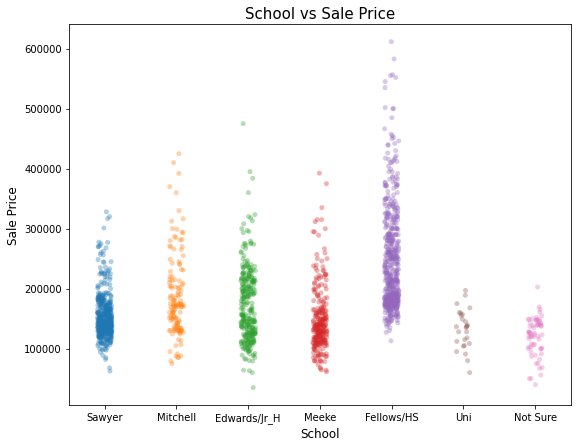

In [24]:
# Lets start off with a stripplot of our Categorical Data

plt.figure(figsize =(9,7))
sns.stripplot(data = train,
              x = 'School',
              y ='SalePrice',
              alpha = 0.35)
plt.xlabel('School', size = 12)
plt.ylabel('Sale Price', size = 12)
plt.title('School vs Sale Price', size = 15)
plt.show()

> Here we can see that if a neighborhood fell into the Fellows/HS, on average, The houses would cost more than if they were to get a house that was in the Uni neighborhood for example, showing that housing prices are in fact affected by the locations of schools at least in Ames because there aren't too many outliers in each group and they are clustered pretty well together

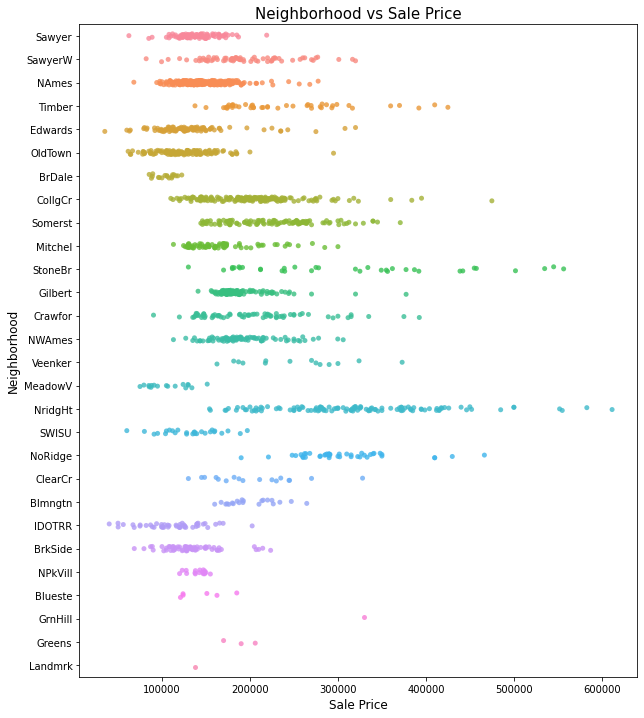

In [36]:
# Lets start off with a stripplot for our Categorical Data

plt.figure(figsize =(10,12))
sns.stripplot(data = train,
              y = 'Neighborhood',
              x ='SalePrice',
              alpha = 0.8)
plt.xlabel('Sale Price', size = 12)
plt.ylabel('Neighborhood', size = 12)
plt.title('Neighborhood vs Sale Price', size = 15)
plt.show()

> Here we can also see that neighborhood has somewhat of a correlation with Sale Price, however, it is much hard to understand than the school stripplot because there are so many more options with this plot vs the schools where we only 7 columns for the schools. Which leads me to my second recommendation

## Recommendation 2 <span id = 'r2'></span>
Don't limit yourself to just what you have at the moment if you can also do a bit more of leg work to get a better model going. Not only might the visual be better, which is what a lot of people understand better than just numerica data, but you can also find new factors to tell your boss to watch out for and look for patterns and trends across your whole Real Estate industry and perhaps make new discoveries.  
This isn't to say that the neighborhood column is useless though. You could always find the ranking of schools and try to establish a numeric value towards the neighborhood based on the schools and proximity as well as doing a poly transformation to see how your neighborhood ranking, schools, and numeric data will affect the Model.  
> Important to note that not all information will be useful. For example I first wanted to use Zip codes, but realized the there were only 3 zips in total which wouldn't really help me much at all

<img src='https://www.ames.k12.ia.us/wp-content/uploads/2015/02/Boubdry2018-e1608315021657.png'>

> Here is the map i used along with **[google maps](https://maps.google.com)** to find the locations of the neighborhoods in each boundry. Taken from **[this website](https://www.ames.k12.ia.us/wp-content/uploads/2015/02/Boubdry2018-e1608315021657.png)** 

<span id ='num_data_viz'> </span>
## Now that we got the Categorical Data out of the way, lets start looking into the numeric Data 
### Lets just make a function to print out scatter plots of the numerica data we have in our training first 

In [37]:
def scatplot(columns):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data = train,
                    x = columns,
                    y = 'SalePrice',
                    alpha = 0.4,
                    color = 'green')
    return plt.show()

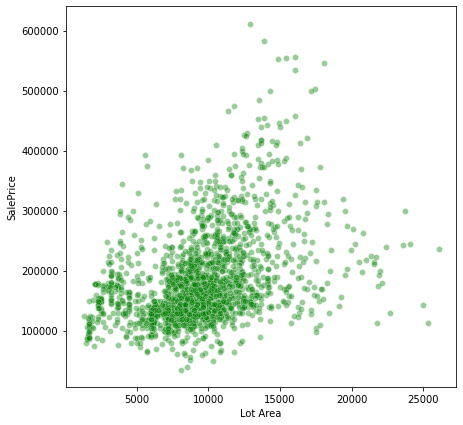

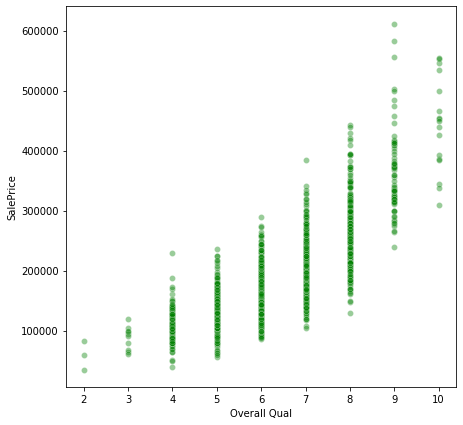

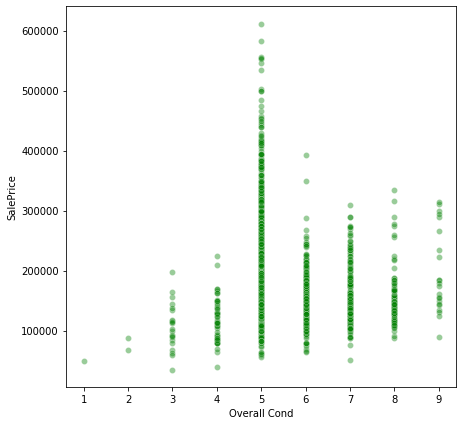

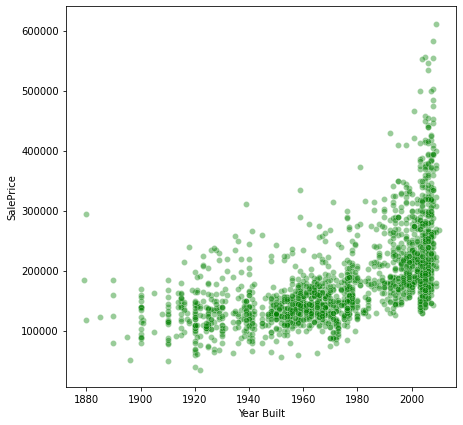

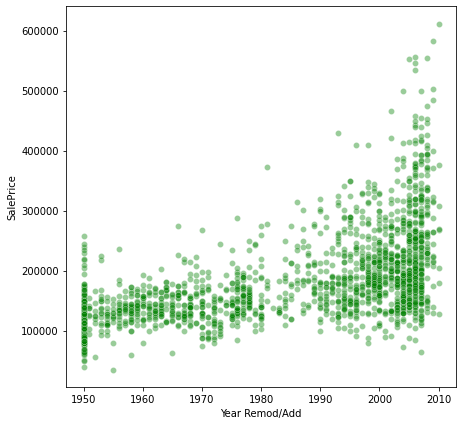

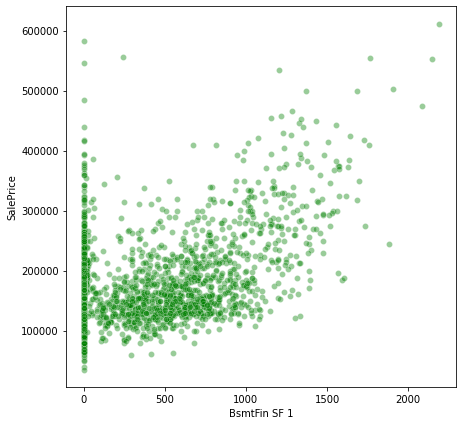

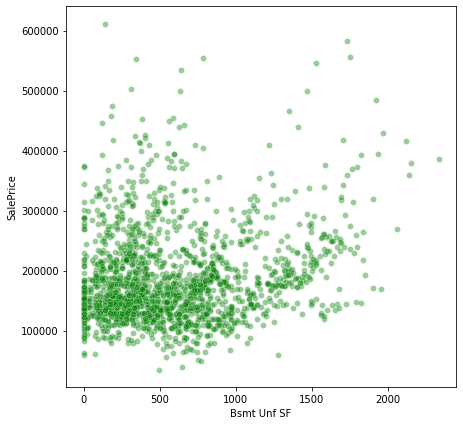

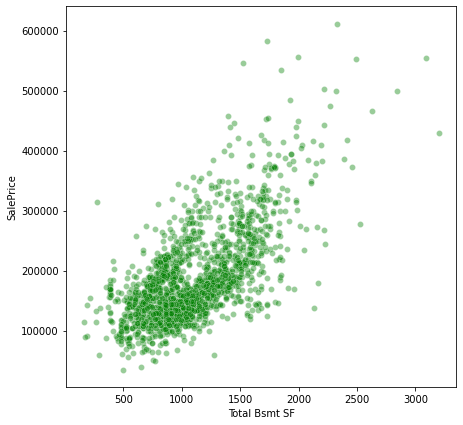

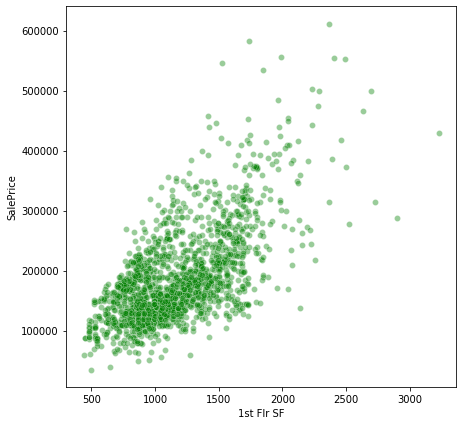

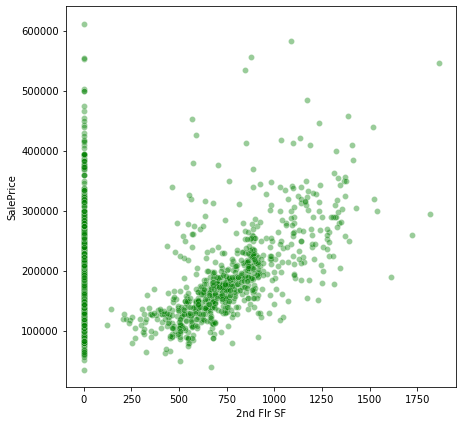

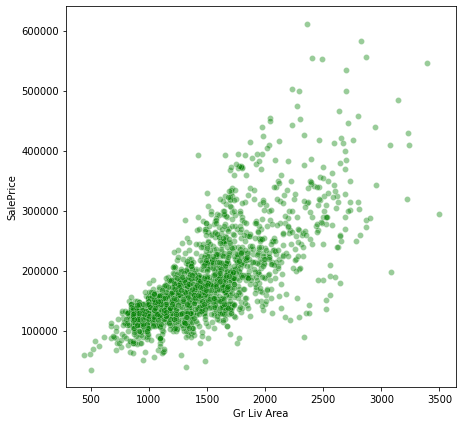

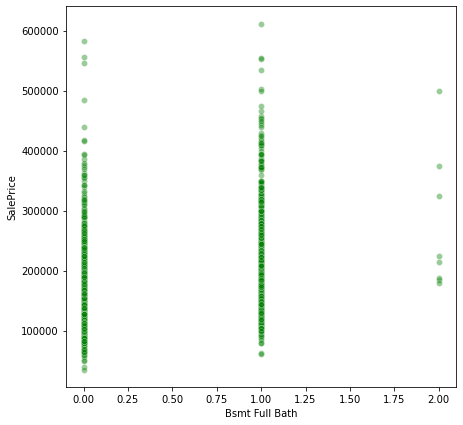

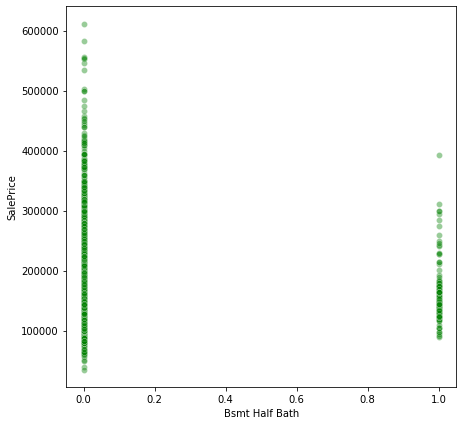

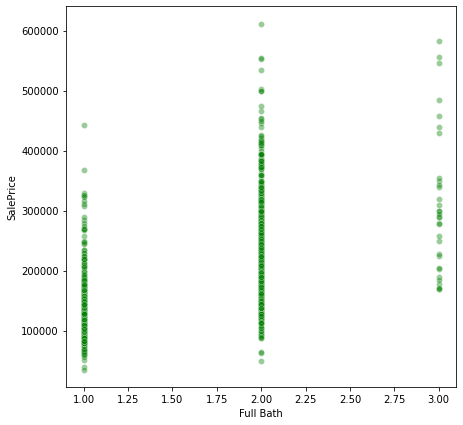

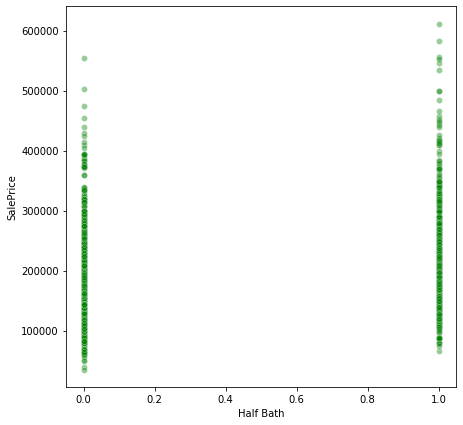

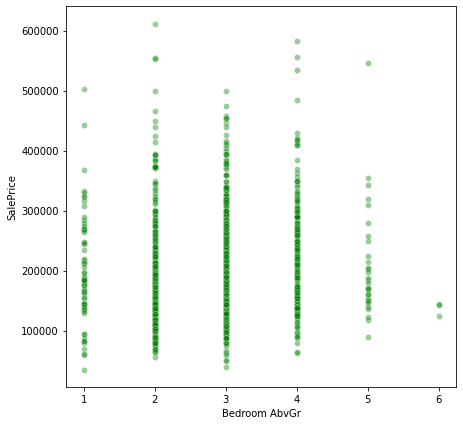

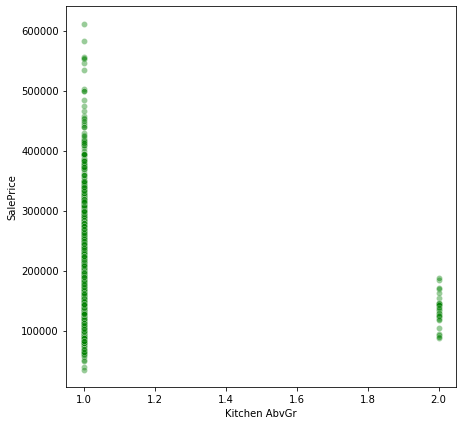

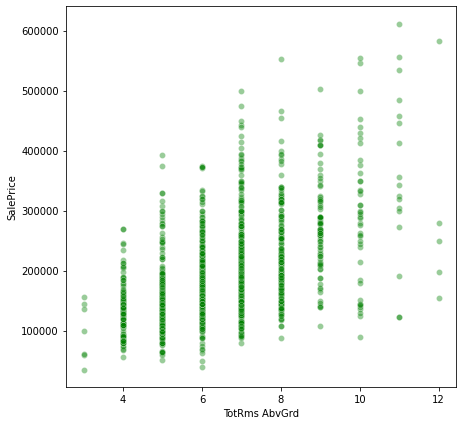

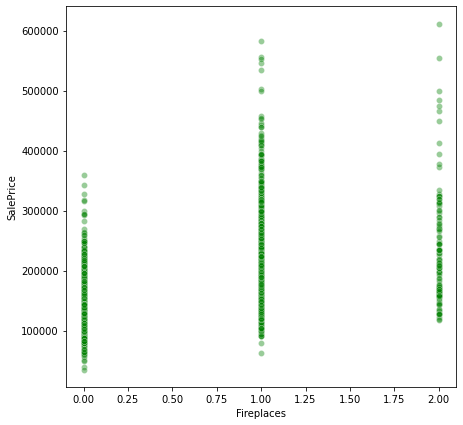

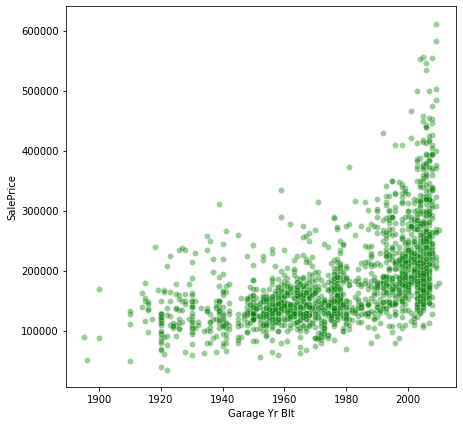

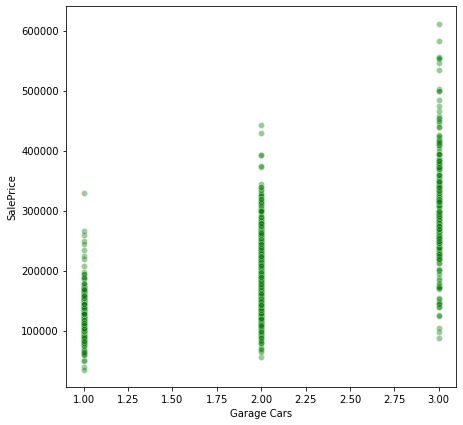

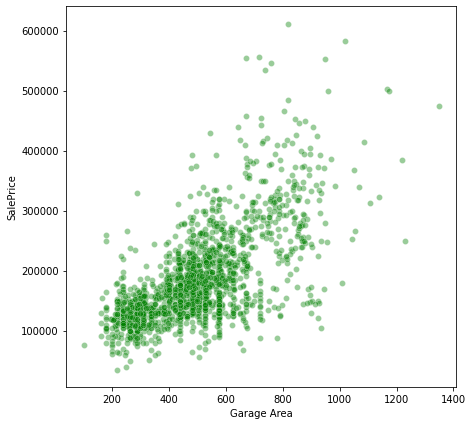

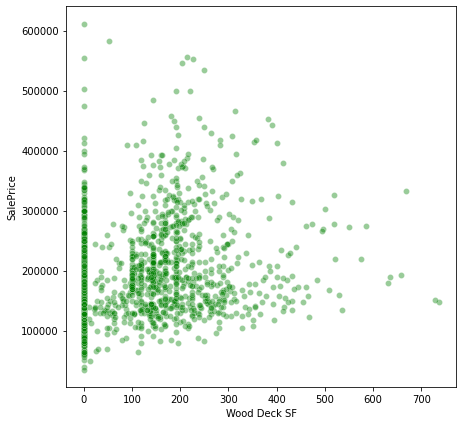

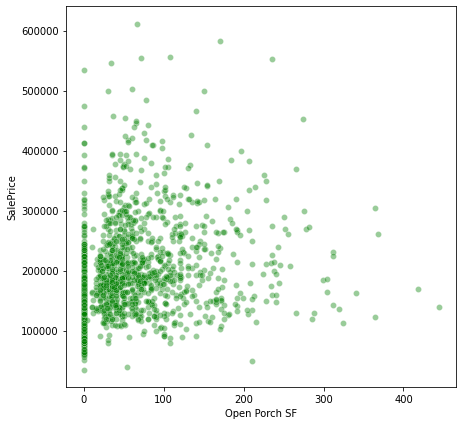

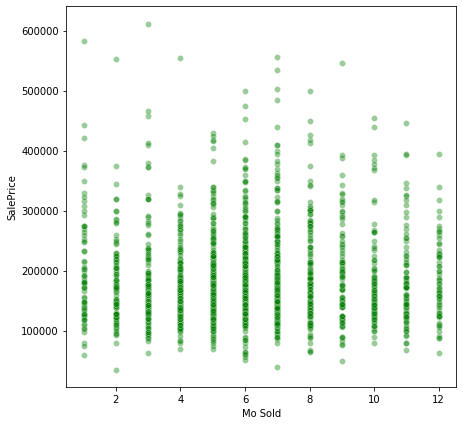

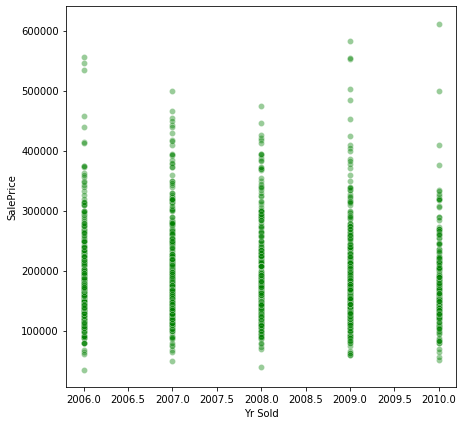

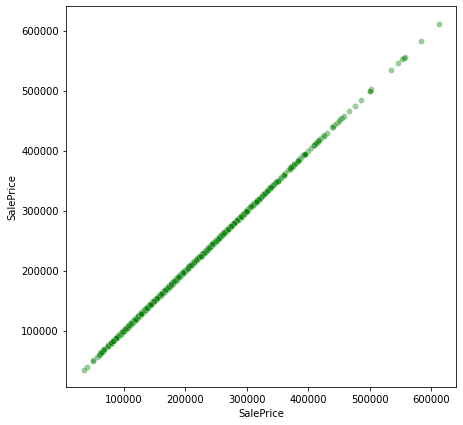

In [40]:
for i in train._get_numeric_data().columns:
    scatplot(i)

> Going back to the cleaning your data idea, if you look at the maps here vs the very first scatter plot we did in notebook 1, you should be able to tell a big difference in how much more zoomed in all the data looks now after getting rid of some impossible outliers such as a house built sometime after the year 2200. There is still more room for cleaning though depending on the size of team and how you decide to clean the data

### How to use a heatmap to your advanatage

<AxesSubplot:>

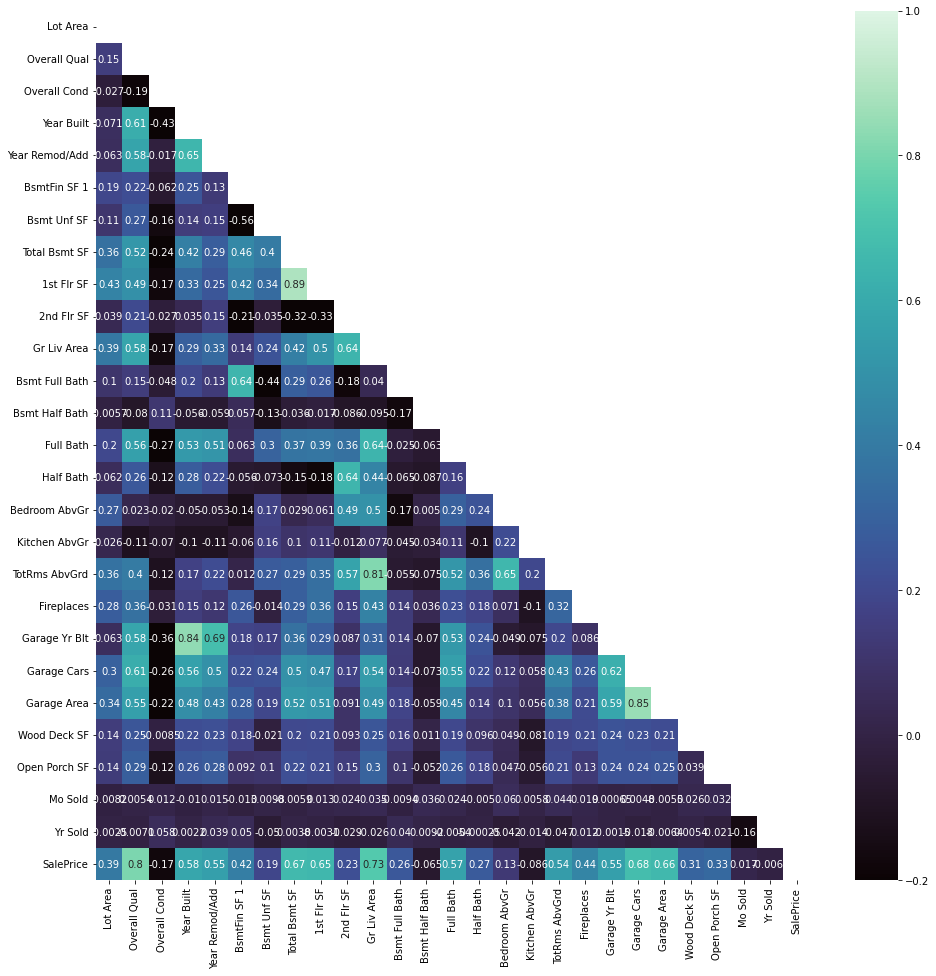

In [55]:
# Lets make a corr chart this time
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 16))
sns.heatmap(corr,
           annot = True,
           cmap = 'mako',
           vmin = -0.2,
           vmax = 1,
           mask = mask)

> **Notice how hard it is to read this** because there are so many features in here, as well as a varitey of colors, all scattered around. While you might be able to find some use in this, most likely, you will be using a different style of heatmap, especially because you already have a target goal in mind, so let me show you that one now

<AxesSubplot:>

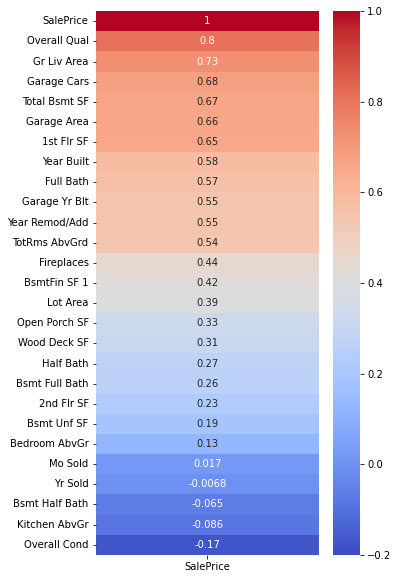

In [58]:
# This will be the better heat map which will provide less overall information, but easier to read and understand
# Not to mention this is what you're actually after, the correlation with features and SalePrice
plt.figure(figsize=(5, 10))
sns.heatmap(corr[['SalePrice']].sort_values('SalePrice', ascending = False),
           annot = True,
           cmap = 'coolwarm',
           vmin = -0.2,
           vmax = 1)

> Here we can see in descending order what parameters have the highest correlation with Sale Price. Starting with 'Overall Qual' down to 'Overall Cond'. This is surprising because this shows that people actually care more about the quality of the hosue, meaning materials used for construction, VS the actual Condition of the house. This does make a bit of sense though because if a new house is made with terrible quality materials, it will degrade a lot faster than an older house made with really good quality materials which is still standing and livable till today.

## Recommendation 3 <span id ='r3'> </span>  
This is going to tie in with the both recommendation 1 and 2. But after you have cleaned your data, it is usually good to try to get some sort of visual going if you can, especially if you will be presenting this later on. More importantly though, you will hopefully be able to get a better understanding of what you're working with. Even if there are thousands of points in your graph, you can zoom out and try to get a bigger picture and understanding. You can also use visuals to help clean up your data by easily spotting outliers.  
>On a side note, make sure to not use confusing or hard to read visuals such as the large heatmap however. Not only will those heatmaps be hard to read and understand because there is so much unneeded information, but can also be a waste of time. Try to also be efficent when using visuals 

<span id = 'stats'></span>
## Visuals are nice and all, but sometimes looking at numbers can really help identify things too when you're feeling stuck, Stats charts can really help you out here

In [56]:
# Lets get some information from our best model 
X_1_constant = sm.add_constant(X_1) # adding constant column 
X_1_stats = sm.OLS(endog = y, exog = X_1_constant).fit()
X_1_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     75.03
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:23:59   Log-Likelihood:                -20126.
No. Observations:                1799   AIC:                         4.094e+04
Df Residuals:                    1453   BIC:                         4.285e+04
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.605e+09   9.99e+08     -1.608      0.108   -3.56e+09    3.53e+08
Lot Area                       -108.2538    269.418     -0.402      0.688    -636.743     420.235
Overall Qual                   6.348e+05   1.04e+06      0.608      0.543   -1.41e+06    2.68e+06
Overall Cond                   -5.76e+04   1.05e+06     -0.055      0.956   -2.11e+06    1.99e+06
Year Built                     4.243e+04   5.83e+04      0.727      0.467    -7.2e+04    1.57e+05
Year Remod/Add                -1.494e+04   6.62e+04     -0.226      0.821   -1.45e+05    1.15e+05
BsmtFin SF 1                  -7080.1525   5637.658     -1.256      0.209   -1.81e+04    3978.666
Bsmt Unf SF                   -8965.7788   5911.856     -1.517      0.130   -2.06e+04    2630.907
Total Bsmt SF                  5792.4347   8090.054      0.716      0.474   -1.01e+04    2.17e+04
1st Flr SF                     4925.2602   4076.717      1.208      0.227   -3071.619    1.29e+04
2nd Flr SF                     1503.4397   3050.560      0.493      0.622   -4480.532    7487.411
Gr Liv Area                    6449.4203   3344.764      1.928      0.054    -111.662     1.3e+04
Bsmt Full Bath                -3.519e+06   2.36e+06     -1.492      0.136   -8.15e+06    1.11e+06
Bsmt Half Bath                 9.225e+05   1.24e+06      0.745      0.456   -1.51e+06    3.35e+06
Full Bath                     -5.923e+06   2.69e+06     -2.199      0.028   -1.12e+07    -6.4e+05
Half Bath                     -2.146e+05    8.8e+05     -0.244      0.807   -1.94e+06    1.51e+06
Bedroom AbvGr                 -1.591e+06   1.63e+06     -0.976      0.329   -4.79e+06    1.61e+06
Kitchen AbvGr                 -9.886e+08   6.15e+08     -1.607      0.108    -2.2e+09    2.18e+08
TotRms AbvGrd                 -6.338e+05   1.17e+06     -0.543      0.587   -2.92e+06    1.66e+06
Fireplaces                     9.077e+05   1.57e+06      0.578      0.564   -2.17e+06    3.99e+06
Garage Cars                   -2.457e+06   2.82e+06     -0.872      0.384   -7.99e+06    3.07e+06
Garage Area                    -525.0121   9361.730     -0.056      0.955   -1.89e+04    1.78e+04
Wood Deck SF                   1.266e+04   6891.559      1.837      0.066    -856.472    2.62e+04
Open Porch SF                 -2.359e+04   1.58e+04     -1.495      0.135   -5.45e+04    7352.481
Mo Sold                         7.36e+05   3.25e+05      2.262      0.024    9.78e+04    1.37e+06
Yr Sold                        2.231e+06    1.4e+06      1.594      0.111   -5.15e+05    4.98e+06
Lot Area^2                    -8.881e-05   3.46e-05     -2.570      0.010      -0.000    -2.1e-05
Lot Area Overall Qual            -0.3417      0.243     -1.408      0.159      -0.818       0.134
Lot Area Overall Cond             0.3296     

> This gives us a lot of information we might find useful as well, and use to fine tune our model such as:
- $R^2$ score
- $R^2_{adj}$ score
- P values
- Coefficents for each value
- Standard Deviations of each parameter
- Condition number to check for multi-colinearity 

#### Now lets Compare this to the 3rd best model which was the same as the number 1 model, except we added neighborhoods as well

In [57]:
X_3_constant = sm.add_constant(X_3)
X_3_stats = sm.OLS(endog = y, exog = X_3_constant).fit()
X_3_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     77.56
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:32:43   Log-Likelihood:                -20035.
No. Observations:                1799   AIC:                         4.080e+04
Df Residuals:                    1432   BIC:                         4.282e+04
Df Model:                         366                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -1.4e+09   9.64e+08     -1.453      0.146   -3.29e+09     4.9e+08
Lot Area                        -87.2374    260.880     -0.334      0.738    -598.985     424.510
Overall Qual                   2.827e+05   1.01e+06      0.280      0.779    -1.7e+06    2.26e+06
Overall Cond                  -3.506e+04   1.01e+06     -0.035      0.972   -2.01e+06    1.94e+06
Year Built                     3.217e+04   5.61e+04      0.573      0.566   -7.79e+04    1.42e+05
Year Remod/Add                -6823.7478   6.36e+04     -0.107      0.915   -1.32e+05    1.18e+05
BsmtFin SF 1                  -6612.2967   5463.999     -1.210      0.226   -1.73e+04    4106.004
Bsmt Unf SF                   -8057.4619   5730.979     -1.406      0.160   -1.93e+04    3184.553
Total Bsmt SF                  1410.1461   7821.240      0.180      0.857   -1.39e+04    1.68e+04
1st Flr SF                     7135.6042   3927.026      1.817      0.069    -567.737    1.48e+04
2nd Flr SF                      194.6090   2940.574      0.066      0.947   -5573.686    5962.904
Gr Liv Area                    7196.8336   3214.414      2.239      0.025     891.368    1.35e+04
Bsmt Full Bath                -2.915e+06   2.27e+06     -1.283      0.200   -7.37e+06    1.54e+06
Bsmt Half Bath                 8.192e+05   1.19e+06      0.687      0.492   -1.52e+06    3.16e+06
Full Bath                     -4.712e+06    2.6e+06     -1.812      0.070   -9.81e+06     3.9e+05
Half Bath                         -5e+04   8.47e+05     -0.059      0.953   -1.71e+06    1.61e+06
Bedroom AbvGr                 -1.099e+06   1.57e+06     -0.699      0.485   -4.18e+06    1.99e+06
Kitchen AbvGr                 -8.626e+08   5.94e+08     -1.452      0.147   -2.03e+09    3.02e+08
TotRms AbvGrd                 -1.319e+06   1.13e+06     -1.172      0.242   -3.53e+06    8.89e+05
Fireplaces                     9.125e+05   1.52e+06      0.600      0.548   -2.07e+06    3.89e+06
Garage Cars                   -2.293e+06   2.73e+06     -0.840      0.401   -7.65e+06    3.06e+06
Garage Area                    1272.7225   9065.268      0.140      0.888   -1.65e+04    1.91e+04
Wood Deck SF                   1.216e+04   6665.577      1.825      0.068    -911.170    2.52e+04
Open Porch SF                 -1.499e+04   1.52e+04     -0.985      0.325   -4.48e+04    1.49e+04
Mo Sold                        6.939e+05   3.14e+05      2.211      0.027    7.84e+04    1.31e+06
Yr Sold                        1.946e+06   1.35e+06      1.440      0.150   -7.04e+05     4.6e+06
Lot Area^2                       -0.0001    3.8e-05     -3.499      0.000      -0.000   -5.84e-05
Lot Area Overall Qual            -0.0576      0.242     -0.238      0.812      -0.532       0.417
Lot Area Overall Cond             0.3057     

> One thing you might find surprising here is that the $R^2$, $R^2_{adj}$, and **F-statistics** are all better in this model, however one thing to remember is that these model test scores aren't all the really matter when making a model, leading me to my 4th recommendation

<span id='r4'></span>
## Recommendation 4
Just because you get good scores on your testing model, doesn't mean that your model will perform as well on new data. Something important to rememebr about the $R^2$ score for example is that it will never go down as you add more features, even if they don't contribute. The score might go up only every so slightly, but thats still a better score. Another thing to remember is that the F-statistics and P value are here to help you look for reasons to reject your null hypothesis. Therefor just say if there is or there isn't a correlation between your feature and your target 'Sale Price' as that is what our null hypothesis is in this case, that there is a contributing factor to sale price based on our y.   
  
Also keep in mind that the more features we add and more complex the model is, the less bias it will have, but doesn't necessarily mean that it will have good variance, or that the model isn't too over fit.    
  
One last note about these two specific models in general is because schools are generally dependent on which neighborhood you reside in, there is a multicolinearity issue with these two columns as well which would further ruin our modeling process


---
<span id='r5'></span>
## Recommendations for future modelings and things to keep in mind
1. Clean Clean Clean, model and clean
1. Make sure you have a specific target (y) in mind before starting the modeling and cleaning process
1. Check to make sure that there aren't multicolinear data in your model such as the schools and neighborhoods
1. Use Outside Sources to your advantage
1. If one model isn't getting good results and you've already done everything else, try another model.
1. **What to do when you encounter Missing Data**
    1. If necessary for work, try to contact who ever you need to in order to verify or retreive the data.
    1. If its just a few rows, you might want to consider dropping the rows, esp if they have outlier data in them
    1. Not use the columns that have a lot of missing data as we did.
    1. Make a model to predict the missing values if you're comfortable enough with modeling
 